In [1]:
import numpy as np
from plotting import plotTF, plotTFs
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************

In [3]:
G1=-392/124          #Gain of stage across which OUT1 and OUT2 are present
OldNorthLFData = np.loadtxt('../20200109_FSS_OLTFs/NorthLF_OUT1_over_OUT2_09-01-2020_184226.txt')
OldNorthHFData = np.loadtxt('../20200109_FSS_OLTFs/NorthHF_OUT1_over_OUT2_09-01-2020_183944.txt')
OldNorthLF = G1*OldNorthLFData[:,1]*np.exp(1j*OldNorthLFData[:,2]*np.pi/180)
OldNorthHF = G1*OldNorthHFData[:,1]*np.exp(1j*OldNorthHFData[:,2]*np.pi/180)
Oldlf = OldNorthLFData[:,0]
Oldhf = OldNorthHFData[:,0]
OldSouthLFData = np.loadtxt('../20200109_FSS_OLTFs/SouthLF_OUT1_over_OUT2_09-01-2020_184643.txt')
OldSouthHFData = np.loadtxt('../20200109_FSS_OLTFs/SouthHF_OUT1_over_OUT2_09-01-2020_185016.txt')
OldSouthLF = G1*OldSouthLFData[:,1]*np.exp(1j*OldSouthLFData[:,2]*np.pi/180)
OldSouthHF = G1*OldSouthHFData[:,1]*np.exp(1j*OldSouthHFData[:,2]*np.pi/180)
OldNorthfug = Oldhf[np.argmin(np.abs(np.abs(OldNorthHF)-1))]/1e3
OldSouthfug = Oldhf[500+np.argmin(np.abs(np.abs(OldSouthHF[500:])-1))]/1e3

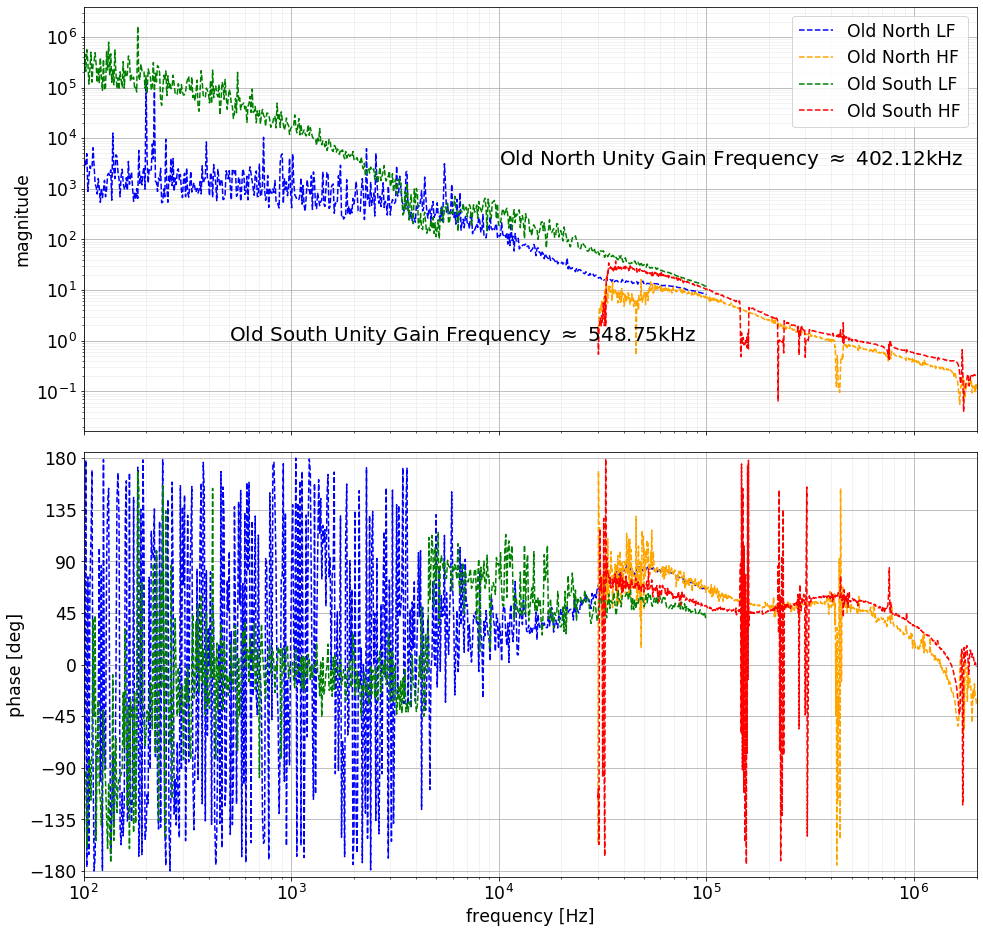

In [4]:
fig = plotTF(Oldlf,OldNorthLF,figsize=[16,16],dB=False, label='Old North LF', ls='--', color='blue');
plotTF(Oldhf,OldNorthHF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='Old North HF', ls='--', color='orange');
plotTF(Oldlf,OldSouthLF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='Old South LF', ls='--', color='green');
plotTF(Oldhf,OldSouthHF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='Old South HF', ls='--', color='red');
ax = fig.axes[0]
fig.axes[0].text(1e4,3e3,r'Old North Unity Gain Frequency $\approx$ '+str(np.round(OldNorthfug,2))+ 'kHz',FontSize=20)
fig.axes[0].text(500,1,r'Old South Unity Gain Frequency $\approx$ '+str(np.round(OldSouthfug,2))+ 'kHz',FontSize=20)
ax.set_xlim((100,2e6))
ax.legend()

In [43]:
G1=-392/124          #Gain of stage across which OUT1 and OUT2 are present
NorthLFData = np.loadtxt('NFSS_OLTF_COM_12_FAST_10_LF_17-07-2020_151542.txt')
NorthHFData = np.loadtxt('NFSS_OLTF_COM_12_FAST_10_HF_17-07-2020_154628.txt')
NorthLF = G1*NorthLFData[:,1]*np.exp(1j*NorthLFData[:,2]*np.pi/180)
NorthHF = G1*NorthHFData[:,1]*np.exp(1j*NorthHFData[:,2]*np.pi/180)
lf = NorthLFData[:,0]
hf = NorthHFData[:,0]
SouthLFData = np.loadtxt('SFSS_OLTF_COM_22_FAST_17_LF_17-07-2020_161408.txt')
SouthHFData = np.loadtxt('SFSS_OLTF_COM_22_FAST_17_HF_17-07-2020_162448.txt')
SouthLF = G1*SouthLFData[:,1]*np.exp(1j*SouthLFData[:,2]*np.pi/180)
SouthHF = G1*SouthHFData[:,1]*np.exp(1j*SouthHFData[:,2]*np.pi/180)
Northfug = hf[np.argmin(np.abs(np.abs(NorthHF)-1))]/1e3
Southfug = hf[500+np.argmin(np.abs(np.abs(SouthHF[500:])-1))]/1e3

In [44]:
fig = plotTF(lf,NorthLF,figsize=[16, 16],dB=False, label='New North LF', color='blue');
plotTF(hf,NorthHF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='New North HF', color='orange');
plotTF(lf,SouthLF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='New South LF', color='green');
plotTF(hf,SouthHF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='New South HF', color='red');
ax = fig.axes[0]
fig.axes[0].text(1e4,1e3,r'New North Unity Gain Frequency $\approx$ '+str(np.round(Northfug,2))+ 'kHz',FontSize=20)
fig.axes[0].text(500,0.3,r'New South Unity Gain Frequency $\approx$ '+str(np.round(Southfug,2))+ 'kHz',FontSize=20)
ax.set_xlim((10,2e6))
ax.legend(ncol=4)
ax.set_title('FSS Open Loop Gains - Boost On\n'
             'South: COMGain=24dB, FastGain=18dB    North:COMGain=12dB, FASTGain=10dB\n'
             'Old: Jan 9th, 2020 : Before notch modification in RFPDs');
figlist = [fig]

In [45]:
G1=-392/124          #Gain of stage across which OUT1 and OUT2 are present
#NorthLFData = np.loadtxt('NFSS_OLTF_COM_12_FAST_10_LF_17-07-2020_151542.txt')
#NorthHFData = np.loadtxt('NFSS_OLTF_COM_12_FAST_10_HF_17-07-2020_154628.txt')
#NorthLF = G1*NorthLFData[:,1]*np.exp(1j*NorthLFData[:,2]*np.pi/180)
#NorthHF = G1*NorthHFData[:,1]*np.exp(1j*NorthHFData[:,2]*np.pi/180)
#lf = NorthLFData[:,0]
#hf = NorthHFData[:,0]
SouthLFData = np.loadtxt('SFSS_OLTF_COM_28_FAST_21_LF_17-07-2020_165851.txt')
SouthHFData = np.loadtxt('SFSS_OLTF_COM_28_FAST_21_HF_2_17-07-2020_171249.txt')
SouthLF = G1*SouthLFData[:,1]*np.exp(1j*SouthLFData[:,2]*np.pi/180)
SouthHF = G1*SouthHFData[:,1]*np.exp(1j*SouthHFData[:,2]*np.pi/180)
#Northfug = hf[np.argmin(np.abs(np.abs(NorthHF)-1))]/1e3
Southfug = hf[500+np.argmin(np.abs(np.abs(SouthHF[500:])-1))]/1e3

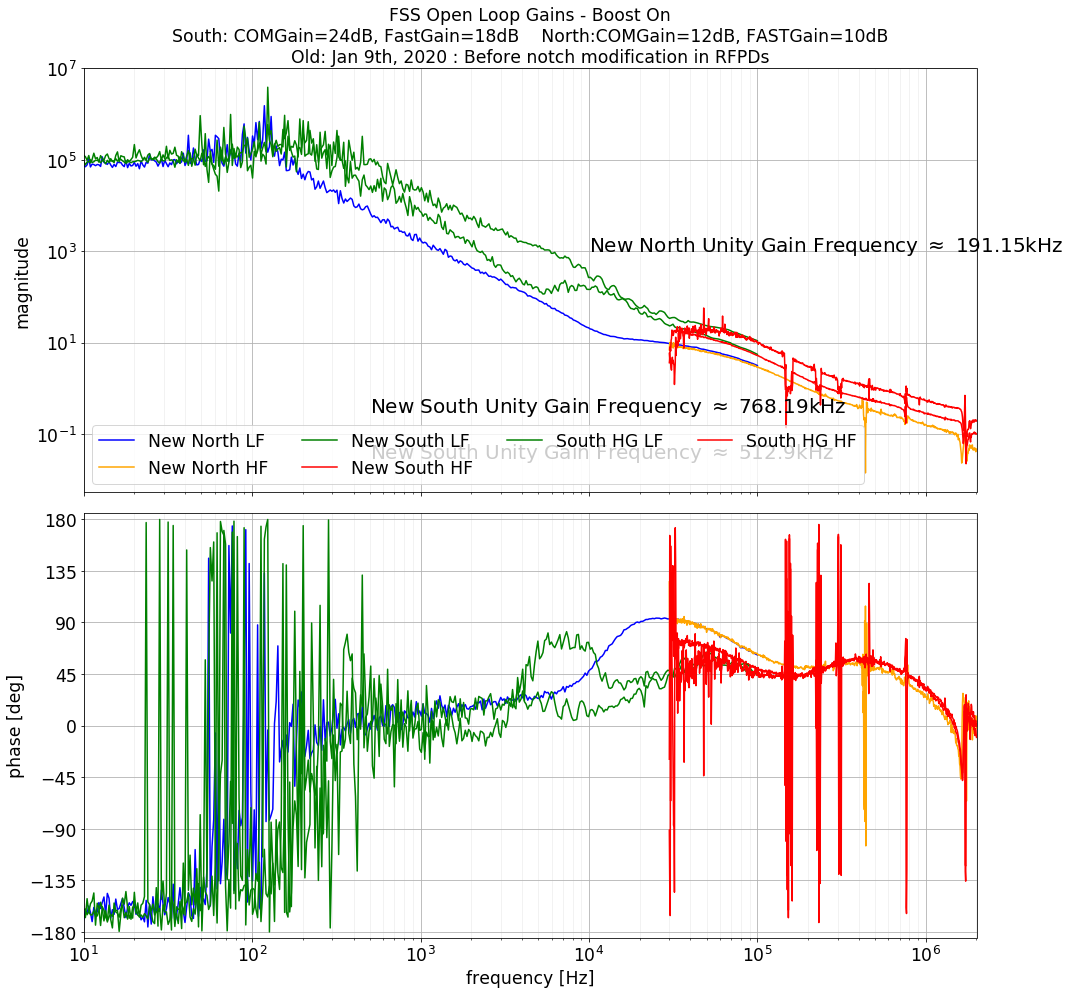

In [46]:
#fig = plotTF(lf,NorthLF,figsize=[16, 16],dB=False, label='New North LF', color='blue');
#plotTF(hf,NorthHF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='New North HF', color='orange');
plotTF(lf,SouthLF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='South HG LF', color='green');
plotTF(hf,SouthHF,mag_ax=fig.axes[0],phase_ax=fig.axes[1],dB=False,label='South HG HF', color='red');
ax = fig.axes[0]
#fig.axes[0].text(1e4,1e3,r'New North Unity Gain Frequency $\approx$ '+str(np.round(Northfug,2))+ 'kHz',FontSize=20)
fig.axes[0].text(500,0.03,r'New South Unity Gain Frequency $\approx$ '+str(np.round(Southfug,2))+ 'kHz',FontSize=20)
ax.set_xlim((10,2e6))
ax.legend(ncol=4)
ax.set_title('FSS Open Loop Gains - Boost On\n'
             'South: COMGain=24dB, FastGain=18dB    North:COMGain=12dB, FASTGain=10dB\n'
             'Old: Jan 9th, 2020 : Before notch modification in RFPDs');
figlist = [fig]
fig

In [24]:
ff = np.concatenate([lf, hf[229:]])
NorthMag = np.concatenate([NorthLFData[:,1], NorthHFData[229:,1]])
SouthMag = np.concatenate([SouthLFData[:,1], SouthHFData[229:,1]])

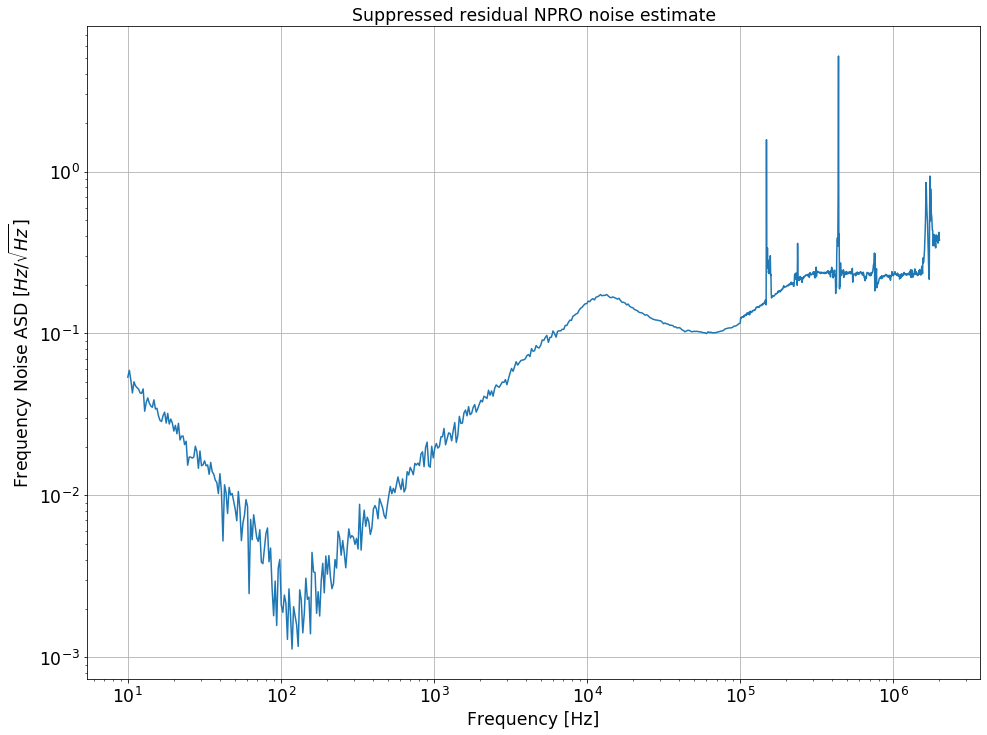

In [25]:
nproFreeASD = 10**4/ff # Hz/Hz**0.5
northResidFreqPSD = (nproFreeASD / NorthMag)**2
southResidFreqPSD = (nproFreeASD / SouthMag)**2
residFreqASD = np.sqrt(northResidFreqPSD + southResidFreqPSD)
fig = plt.figure(figsize=[16,12])
ax = fig.gca()
ax.loglog(ff, residFreqASD)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Frequency Noise ASD [$Hz/\sqrt{Hz}$]')
ax.grid()
ax.set_title('Suppressed residual NPRO noise estimate')
figlist += [fig]

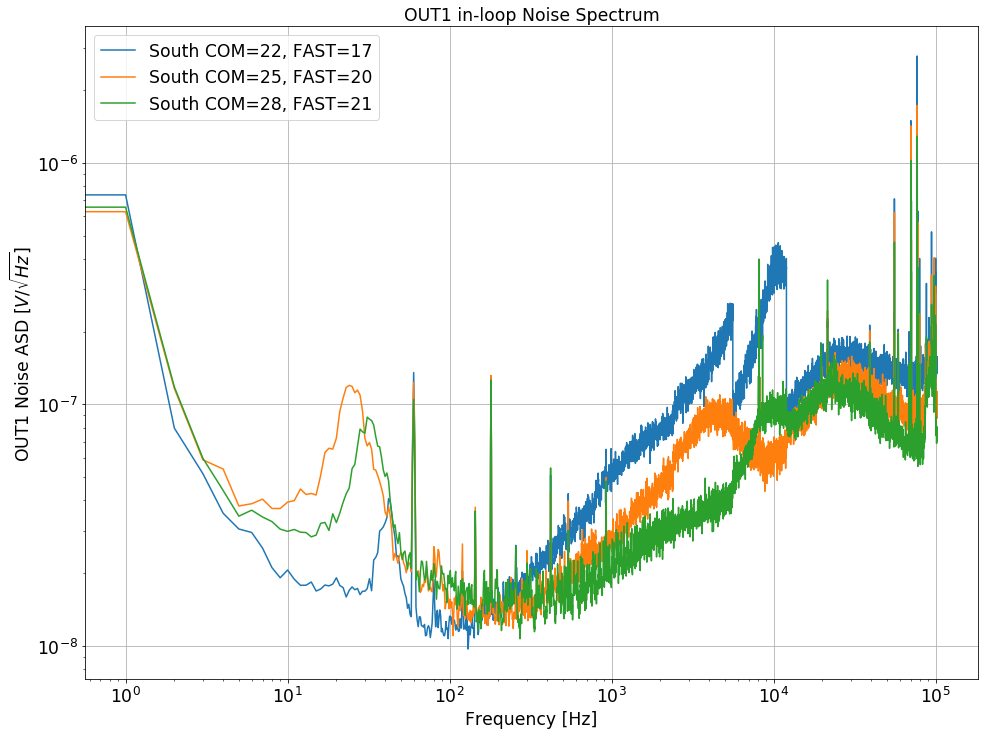

In [30]:
SouthASD_1 = np.loadtxt('SFSS_OUT2_OUT1_COM22_FAST17_Spec_17-07-2020_160357.txt')
SouthASD_2 = np.loadtxt('SFSS_OUT2_OUT1_COM25_FAST20_Spec_17-07-2020_163438.txt')
SouthASD_3 = np.loadtxt('SFSS_OUT2_OUT1_COM28_FAST21_Spec_17-07-2020_164713.txt')
ff = SouthASD_1[:, 0]
fig = plt.figure(figsize=[16,12])
ax = fig.gca()
ax.loglog(ff, SouthASD_1[:, 2], label='South COM=22, FAST=17')
ax.loglog(ff, SouthASD_2[:, 2], label='South COM=25, FAST=20')
ax.loglog(ff, SouthASD_3[:, 2], label='South COM=28, FAST=21')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('OUT1 Noise ASD [$V/\sqrt{Hz}$]')
ax.grid()
ax.legend()
ax.set_title('OUT1 in-loop Noise Spectrum')
figlist += [fig]

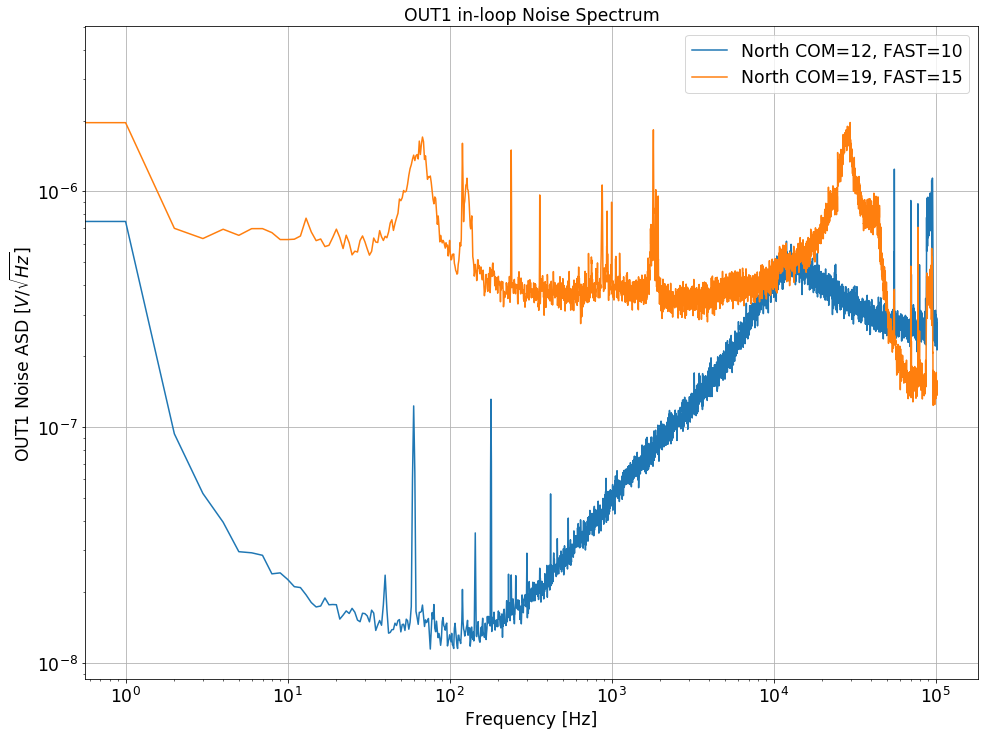

In [49]:
NorthASD_1 = np.loadtxt('NFSS_OUT2_OUT1_COM12_FAST10_Spec_17-07-2020_152811.txt')
NorthASD_2 = np.loadtxt('NFSS_OUT2_OUT1_COM19_FAST15_Spec_17-07-2020_172615.txt')
ff = NorthASD_1[:, 0]
fig = plt.figure(figsize=[16,12])
ax = fig.gca()
ax.loglog(ff, NorthASD_1[:, 2], label='North COM=12, FAST=10')
ax.loglog(ff, NorthASD_2[:, 2], label='North COM=19, FAST=15')
#ax.loglog(ff, NorthASD_3[:, 2], label='North COM=28, FAST=21')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('OUT1 Noise ASD [$V/\sqrt{Hz}$]')
ax.grid()
ax.legend()
ax.set_title('OUT1 in-loop Noise Spectrum')
figlist += [fig]

In [ ]:
pp = PdfPages('FSS_OLTF.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()